## <span style="background-color: #D3D3D3; font-weight: bold;">Giai đoạn 3: Phân tích mối tương quan giữa các biến (Correlation)

<style>
    body {
        margin: 0;
        font-family: Arial, sans-serif;
    }
    h2 {
        color: #4CAF50;
        text-align: center;
        font-size: 26px;
    }
    table {
        width: 80%;
        margin: 50px auto; /* Căn giữa bảng */
        border-collapse: collapse;
        font-size: 20px;
    }
    th, td {
        border: 1px solid #dddddd;
        text-align: center;
        padding: 15px;
    }
    th {
        background-color: #4CAF50;
        color: white;
        font-size: 22px;
    }
    tr:nth-child(even) {
        background-color: #f9f9f9;
    }
    tr:nth-child(odd) {
        background-color: #ffffff;
    }
    .icon {
        color: #4CAF50;
        font-size: 22px;
        margin-right: 8px;
    }
    a {
        text-decoration: none;
        color: #4CAF50;
    }
</style>

<h2>Nhóm 3 - CSC12110 - PTDLUD</h2>

<table>
    <tr>
        <th>MSSV</th>
        <th>Họ Tên</th>
        <th>Email</th>
    </tr>
    <tr>
        <td>18127008</td>
        <td><i class="icon">👨‍💻</i> Lê Mạnh Hoàng</td>
        <td><a href="mailto:lmhoang18@clc.fitus.edu.vn">lmhoang18@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127211</td>
        <td><i class="icon">👩‍💻</i> Nguyễn Vũ Tường An</td>
        <td><a href="mailto:nvtan21@clc.fitus.edu.vn">nvtan21@clc.fitus.edu.vn</a></td>
    </tr>
    <tr>
        <td>21127699</td>
        <td><i class="icon">👩‍💻</i> Lô Thủy Tiên</td>
        <td><a href="mailto:lttien21@clc.fitus.edu.vn">lttien21@clc.fitus.edu.vn</a></td>
    </tr>
</table>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split, cross_val_score


data = pd.read_excel("cleaned_2425_QC.xlsx")

In [2]:
print("Some top rows of the data:")
data.head()

Some top rows of the data:


,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 00:53,0
1,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 01:39,0
2,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 02:31,0
4,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 03:36,0


<h2 style="color: #4CAF50;">1. Dùng thuật toán Random Forest.</h2>

In [3]:
# Preprocess the data
# drop 'Timestamp' column for now as it's not needed for prediction
random_forest_data = data.drop(columns=['Timestamp'])

In [4]:
# Identify columns with object data type and apply label encoding
object_columns = random_forest_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in object_columns:
    le = LabelEncoder()
    random_forest_data[col] = le.fit_transform(random_forest_data[col])
    label_encoders[col] = le

In [5]:
# Split the data into features and target variable
X = random_forest_data.drop(columns=['Clicked on Ad'])
y = random_forest_data['Clicked on Ad']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

<h3 style="color:rgb(236, 82, 5);">a. Random Forest Classifier Model</h3>

In [6]:
# Train and evaluate Random Forest Classifier model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_test, y_pred_rf_clf)

In [7]:
# Print accuracy scores
print(f"Random Forest Classifier Accuracy: {rf_clf_accuracy}")

# Print classification reports
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf_clf))

Random Forest Classifier Accuracy: 0.89

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       146
           1       0.92      0.86      0.89       154

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [8]:
# Check feature importance for Random Forest Classifier
feature_importances_clf = rf_clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importance_clf_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_clf})
feature_importance_clf_df = feature_importance_clf_df.sort_values(by='Importance', ascending=False)

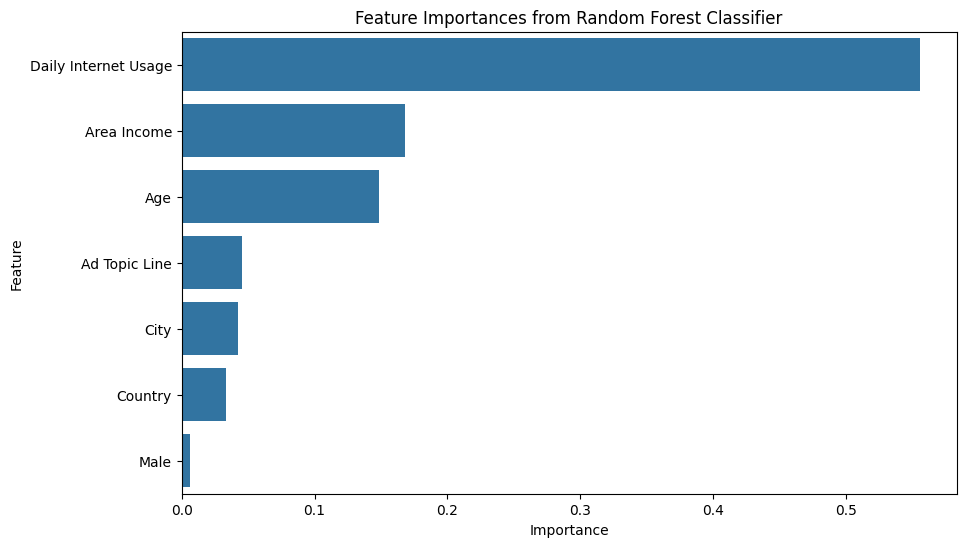

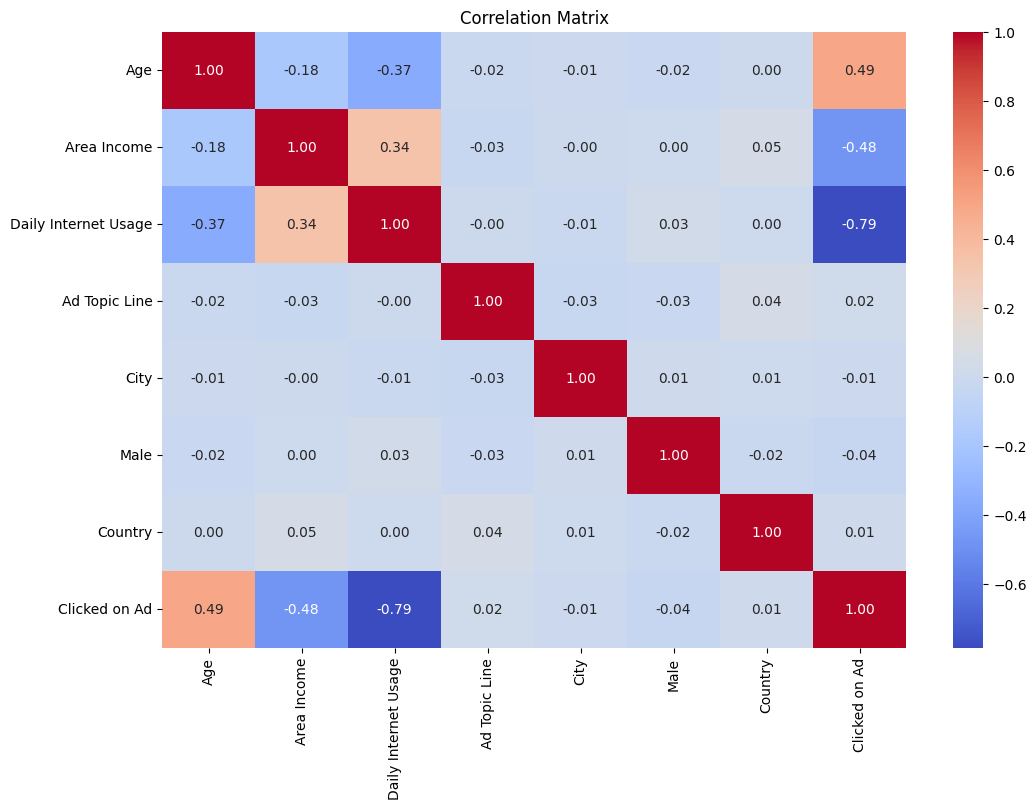

Correlation between 'Area Income' and 'Clicked on Ad': -0.4769046351199011


In [9]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_clf_df)
plt.title('Feature Importances from Random Forest Classifier')
plt.show()

# Check correlation matrix to see the correlation between features and target variable
correlation_matrix = random_forest_data.corr()

# Plot correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Check the correlation of 'Area Income' with 'Clicked on Ad'
income_correlation = correlation_matrix.loc['Area Income', 'Clicked on Ad']
print(f"Correlation between 'Area Income' and 'Clicked on Ad': {income_correlation}")

<h3 style="color:rgb(236, 82, 5);">b. Random Forest Regressor Model</h3>

In [11]:
# Build the model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE on test set:", rmse)

RMSE on test set: 0.2839870889083985


In [12]:
# Sử dụng KFold với 5 lần gập (n_splits=5) và shuffle=True để đảm bảo dữ liệu được xáo trộn mỗi lần chia.
kf = KFold(n_splits=5, shuffle=True, random_state=42) 
#Thiết lập random_state với một giá trị cụ thể -> đảm bảo rằng bất kỳ lần chạy nào của mã đó sẽ cho kết quả giống nhau, miễn là dữ liệu đầu vào không thay đổi.
#Chạy trên cùng tham số, thiết lập -> cho kqua giống nhau

# Tính RMSE bằng cross_val_score
train_rmse_scores = -cross_val_score(rf_reg, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# In kết quả
print("Cross-validated RMSE on training set for each fold:", train_rmse_scores)
print("Mean RMSE on training set:", np.mean(train_rmse_scores))

# Predict on the test set
y_pred_test = rf_reg.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE on test set:", test_rmse)

Cross-validated RMSE on training set for each fold: [0.25129095 0.22215664 0.23256796 0.27163526 0.24883012]
Mean RMSE on training set: 0.2452961863433026
RMSE on test set: 0.2839870889083985


In [15]:
# Get feature importances from Random Forest Regressor
feature_importances_reg = rf_reg.feature_importances_

# Create a DataFrame for feature importances from regressor
feature_importance_reg_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_reg})
feature_importance_reg_df = feature_importance_reg_df.sort_values(by='Importance', ascending=False)


<h3 style="color:rgb(236, 82, 5);">So sánh kết quả của 2 model trên</h3>

In [16]:
# Print feature importances from both models
print("Feature Importances from Random Forest Classifier:")
print(feature_importance_clf_df)

print("\nFeature Importances from Random Forest Regressor:")
print(feature_importance_reg_df)

Feature Importances from Random Forest Classifier:
                Feature  Importance
2  Daily Internet Usage    0.555369
1           Area Income    0.168297
0                   Age    0.148822
3         Ad Topic Line    0.045172
4                  City    0.042661
6               Country    0.033665
5                  Male    0.006014

Feature Importances from Random Forest Regressor:
                Feature  Importance
2  Daily Internet Usage    0.753299
0                   Age    0.085434
1           Area Income    0.085406
4                  City    0.028044
3         Ad Topic Line    0.024247
6               Country    0.021714
5                  Male    0.001855


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét về kết quả mối tương quan giữa các thuộc tính với 'Clicked on Ad'</strong>
</div>

1. **Daily Internet Usage**: <br>
    - Classifier: Đây là đặc trưng quan trọng nhất với tầm quan trọng 0.396926. <br>
    - Regressor: Đây cũng là đặc trưng quan trọng nhất với tầm quan trọng 0.685476. <br>
    - Kết luận: Thời gian sử dụng Internet hàng ngày có ảnh hưởng lớn đến khả năng click vào quảng cáo. <br>
2. **Daily Time Spent on Site**: <br>
    - Classifier: Đây là đặc trưng quan trọng thứ hai với tầm quan trọng 0.358433. <br>
    - Regressor: Đây cũng là đặc trưng quan trọng thứ hai với tầm quan trọng 0.217669. <br>
    - Kết luận: Thời gian sử dụng trang web hàng ngày cũng có ảnh hưởng lớn đến khả năng click vào quảng cáo. <br>
3. **Age**: <br>
    - Classifier: Đặc trưng này có tầm quan trọng 0.096253. <br>
    - Regressor: Đặc trưng này có tầm quan trọng 0.028421. <br>
    - Kết luận: Tuổi của người dùng có ảnh hưởng nhưng không lớn bằng thời gian sử dụng Internet và trang web. <br>
4. **Area Income**: <br>
    - Classifier: Đặc trưng này có tầm quan trọng 0.088554. <br>
    - Regressor: Đặc trưng này có tầm quan trọng 0.040069. <br>
    - Kết luận: Thu nhập của khu vực có ảnh hưởng đến khả năng click vào quảng cáo, nhưng không lớn bằng các đặc trưng khác. <br>
5. **Các đặc trưng khác**: <br>
    - Ad Topic Line, City, Country, Male: Các đặc trưng này có tầm quan trọng thấp hơn nhiều so với các đặc trưng chính như Daily Internet Usage và Daily Time Spent on Site. <br>

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Kết luận</strong>
</div>

- <strong>Daily Internet Usage</strong> và <strong>Daily Time Spent on Site</strong> là hai đặc trưng quan trọng nhất trong việc dự đoán khả năng click vào quảng cáo.
- <strong>Age</strong> và <strong>Area Income</strong> cũng có ảnh hưởng nhưng không lớn bằng hai đặc trưng trên.
- Các đặc trưng khác như <strong>Ad Topic Line, City, Country</strong>, và <strong>Male</strong> có tầm quan trọng thấp hơn nhiều.

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>So sánh hai mô hình Random Forest Classifier và Random Forest Regressor</strong>
</div>

**1. Random Forest Classifier** <br>
  - ***Cross-Validation Results:*** <br>
    + Precision: 0.97 <br>
    + Recall: 0.96 <br>
    + F1 Score: 0.96 <br>
  - ***Final Evaluation on Test Set:*** <br>
    + Precision: 0.95 <br>
    + Recall: 0.96 <br>
    + F1 Score: 0.96 <br>
    
**2. Random Forest Regressor** <br>
  - ***Cross-Validation Results:*** <br>
    + RMSE cho mỗi lần gập: [0.1731, 0.1683, 0.1857, 0.2220, 0.1613] <br>
    + Mean RMSE trên tập huấn luyện: 0.1821 <br>
  - ***Final Evaluation on Test Set:*** <br>
    + RMSE trên tập kiểm tra: 0.1908

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Nhận xét</strong>
</div>

**1. Độ chính xác của mô hình:**<br>
    - <strong>Random Forest Classifier</strong>: Mô hình này có độ chính xác cao với các độ đo <strong>precision, recall, và f1-score</strong> đều trên <strong>0.95</strong>. Điều này cho thấy mô hình có khả năng phân loại chính xác khả năng click vào quảng cáo. <br>
    - <strong>Random Forest Regressor</strong>: Mô hình này cũng có độ chính xác cao với <strong>RMSE trung bình</strong> trên tập huấn luyện là <strong>0.1821</strong> và <strong>RMSE</strong> trên tập kiểm tra là <strong>0.1908</strong>. Điều này cho thấy mô hình có khả năng dự đoán chính xác giá trị liên tục của khả năng click vào quảng cáo. <br>

**2. Cross-Validation:** <br>
    - <strong>Random Forest Classifier</strong>: Cross-validation cho thấy mô hình hoạt động ổn định với các độ đo <strong>precision, recall, và f1-score</strong> đều cao. <br>
    - <strong>Random Forest Regressor</strong>: Cross-validation cho thấy mô hình hoạt động ổn định với <strong>RMSE trung bình thấp</strong>, cho thấy mô hình không bị <strong>overfitting</strong> hoặc <strong>underfitting</strong>.<br>

<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Kết luận</strong>
</div>

- <strong>Random Forest Classifier</strong>: Phù hợp cho <strong>bài toán phân loại</strong>, đặc biệt khi cần dự đoán khả năng click vào quảng cáo dưới dạng <strong>nhị phân</strong> (có hoặc không).<br>
- <strong>Random Forest Regressor</strong>: Phù hợp cho bài toán <strong>dự đoán giá trị liên tục</strong>, nhưng trong trường hợp này, bài toán phân loại có vẻ phù hợp hơn.<br>


<div style=" color: #4CAF50; font-size: 20px;">
  <strong>Lựa chọn mô hình</strong>
</div>

- <strong>Random Forest Classifier</strong> được lựa chọn làm mô hình cuối cùng do <strong>độ chính xác cao</strong> và <strong>phù hợp với bài toán phân loại</strong> khả năng click vào quảng cáo.